# <span style="color:#D291BC">Secuencias y formatos</span>

## <span style="color:#957DAD">Índice</span>

### Contenido

+ <a href="#Bio.Seq" style="color:#E18AAA">Bio.Seq</a>
+ <a href="#Fasta" style="color:#E18AAA">Fasta</a>
+ <a href="#Fastq" style="color:#E18AAA">Fastq</a>
+ <a href="#GenBank" style="color:#E18AAA">GenBank</a>
+ <a href="#Protein_Data_Bank" style="color:#E18AAA">Protein Data Bank</a>
+ <a href="#BLAST_Output" style="color:#E18AAA">BLAST Output</a>
+ <a href="#File_Format_Conversions" style="color:#E18AAA">File Format Conversions</a>

### Ejercicios
+ <a href="#Ejercicio_1" style="color:#058B8C">Ejercicio 1</a>
+ <a href="#Ejercicio_2" style="color:#058B8C">Ejercicio 2</a>
+ <a href="#Ejercicio_3" style="color:#058B8C">Ejercicio 3</a>
+ <a href="#Ejercicio_4" style="color:#058B8C">Ejercicio 4</a>
+ <a href="#Ejercicio_5" style="color:#058B8C">Ejercicio 5</a>
+ <a href="#Ejercicio_6" style="color:#058B8C">Ejercicio 6</a>


<p id="#Bio.Seq"></p>



### Biopython documentation

[Biopython wiki page](http://biopython.org/)

[Getting started](http://biopython.org/wiki/Category%3AWiki_Documentation)

[Biopython tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html#chapter:Bio.SeqIO)

[Complete tree of Biopython Classes](http://biopython.org/DIST/docs/api/Bio-module.html)

<p id="#Bio.Seq"></p>

## <span style="color:#957DAD">Bio.Seq</span>

In [2]:
import Bio.Seq                          
seqobj = Bio.Seq.Seq('ATGCGATCGAGC')     
# convert to string with str(seqobj)
seq_str = str(seqobj)
print('{} tiene {} nucleotidos'.format( seq_str , len(seq_str)))


ATGCGATCGAGC tiene 12 nucleotidos


### From ... import ...

Otra manera de importar módulos es con `from ... import ...` . Esto evita que tengamos que escribir el nombre de la clase todo el tiempo. Bio.Seq es el nombre de la clase. Bio es la superclase. Seq es la subclase dentro de Bio. Se escribe Bio.Seq. Seq tiene diferentes subclases, de las cuales una es llamada Seq. Así que tenemos Bio.Seq.Seq. Para hacer el proceso más sencillo, llamamos Seq() después de importar con `from ... import ...` de esta manera.

In [4]:
from Bio.Seq import Seq
seqobj=Seq('ATGCGATCGAGC')
seq_str=str(seqobj)
protein = seqobj.translate()
prot_str = str(protein)
print('{} se traduce a {}'.format(seq_str,prot_str))


ATGCGATCGAGC se traduce a MRSS


In [5]:
seqobj.complement()

Seq('TACGCTAGCTCG')

In [6]:
rna = seqobj.transcribe()
rna

Seq('AUGCGAUCGAGC')

In [7]:
rna.back_transcribe()

Seq('ATGCGATCGAGC')


### Extraer una subsecuencia

Puedes utilizar un rango [0:3] para obtener el primer codón



In [30]:
seqobj=Seq('ATGCGATCGAGC')
seqobj[0:3]

Seq('ATG')

Vamos a utilizar expresiones Regulares en conjunción con BioPython para obtener cada codón

In [4]:
seqobj=Seq('ATGCGATCGAGC')
import re
for codon in re.findall(r"(.{3})",str(seqobj)):
    print(codon)

ATG
CGA
TCG
AGC


### String matching

Buscar un patrón (ACG)

In [23]:
#nt_search
from Bio.Seq import Seq
from Bio import SeqUtils
pattern = Seq("ACG")
sequence = Seq("ATGCGCGACGGCGTGATCAGCTTATAGCCGTACGACTGCTGCAACGTGACTGAT")
results = SeqUtils.nt_search(str(sequence),pattern)
print(results)

['ACG', 7, 31, 43]


In [24]:
results_rc = SeqUtils.nt_search(str(sequence),pattern.reverse_complement())
print(results_rc)

['CGT', 11, 28, 44]


### Secuencia consenso


<div>
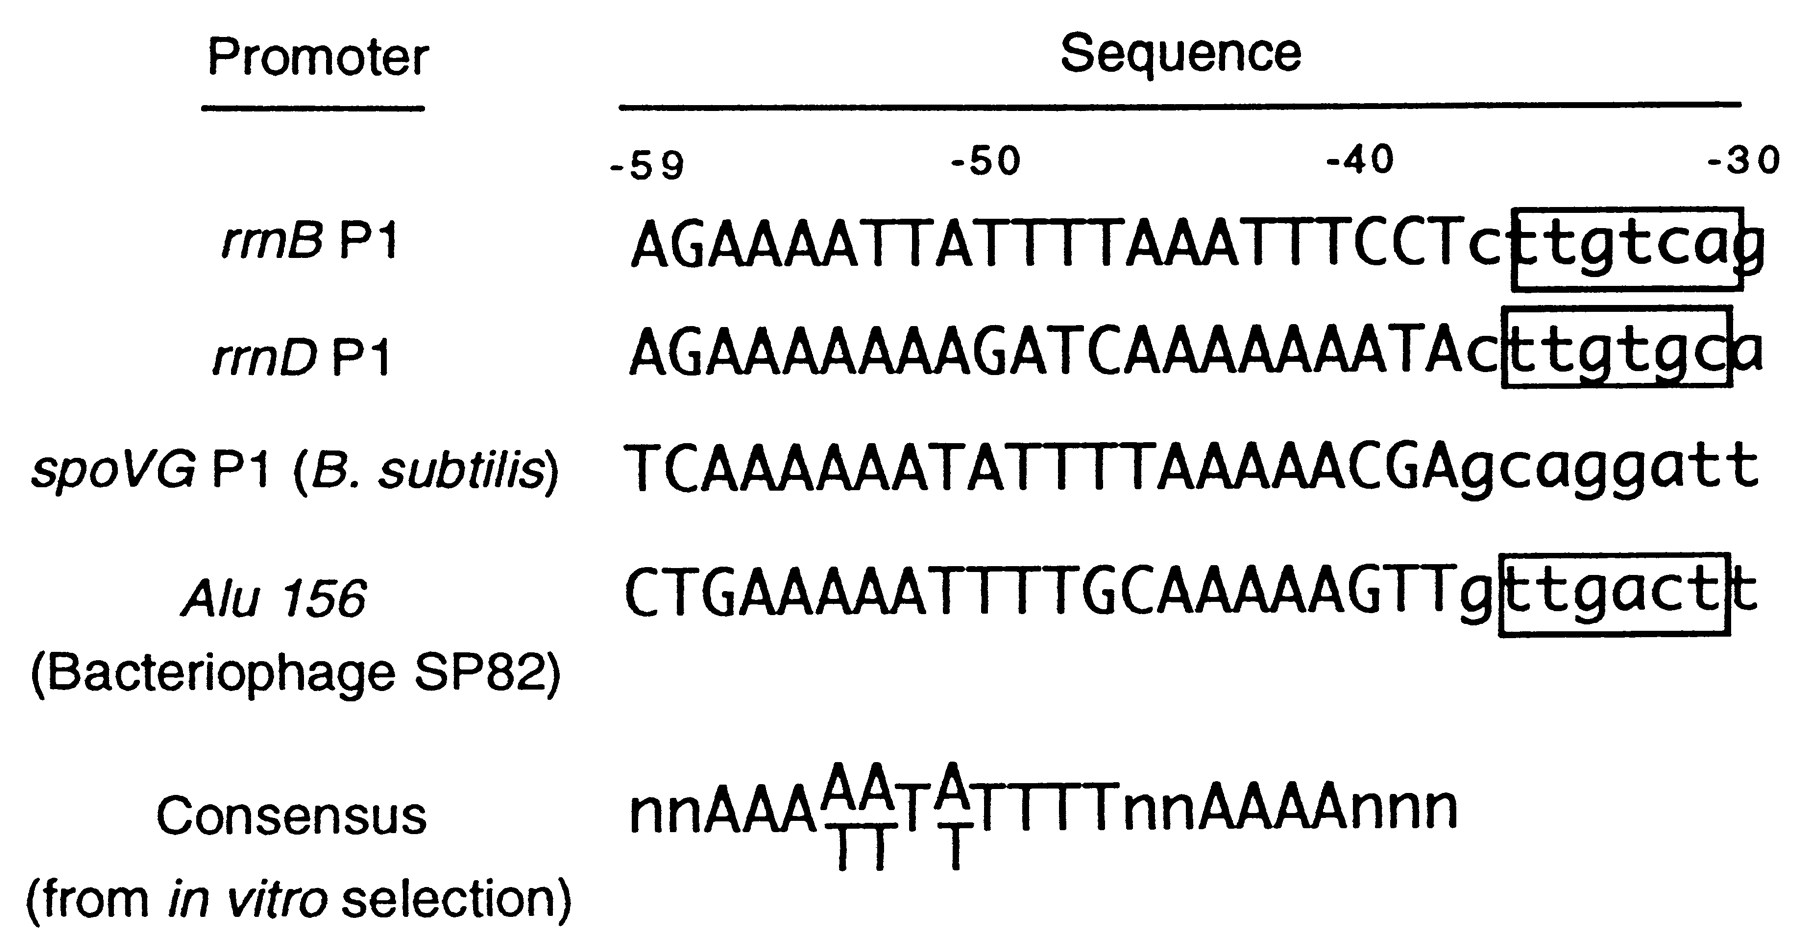
</div>


In [15]:
from Bio import SeqUtils
consensus = "RGWYV"
sequence = "CGTAGCTAGCTCAGAGCAGGGACACGTGCTAGCAACAGCGCT"
SeqUtils.nt_search(sequence,consensus)


['[AG]G[AT][CT][ACG]', 19]

In [18]:
sequence[19:19+len(consensus)]

'GGACA'

No son mutables

In [5]:
seqobj[0]="T"

TypeError: 'Seq' object does not support item assignment

In [6]:
mut_seq = seqobj.tomutable()
mut_seq

MutableSeq('ATGCGATCGAGC')

In [7]:
mut_seq[0]="T"
print(mut_seq)

TTGCGATCGAGC


In [8]:
from Bio.Seq import MutableSeq

mut_seq = MutableSeq('ATGCGATCGAGC')

In [9]:
mut_seq[0]="T"
print(mut_seq)

TTGCGATCGAGC


In [10]:
mut_seq.reverse()
print("\nreverso: %s" % (mut_seq))

mut_seq.complement()
print("\ncomplemento: %s" % (mut_seq))

mut_seq.reverse_complement()
print("\nreverso_complemento: %s" % (mut_seq))

print("\nNota: Seq no es mutable; por ende, el método reverse() no es aplicable aquí:")
seqobj.reverse()


reverso: CGAGCTAGCGTT

complemento: GCTCGATCGCAA

reverso_complemento: TTGCGATCGAGC

Nota: Seq no es mutable; por ende, el método reverse() no es aplicable aquí:


AttributeError: 'Seq' object has no attribute 'reverse'

In [11]:
seqobj

Seq('ATGCGATCGAGC')

In [17]:
from Bio.SeqUtils import GC
GC(seqobj)

58.333333333333336

In [15]:
gc='AG'

In [18]:
GC(gc)

50.0

In [20]:
from Bio.SeqUtils import molecular_weight #Calculate the molecular mass 
molecular_weight(seqobj)


3750.3901999999994

In [12]:
print(seqobj.count("A"))  # counts how many As are in sequence
print(seqobj.count("AT"))
print(seqobj.find("ATG")) # find coordinate of ATG (-1 for not found)

3
2
0


In [31]:
seqobj

Seq('ATGCGATCGAGC')

In [32]:
print(seqobj.find("GC"))

2


In [11]:
print(seqobj.find("AAA"))

-1


In [33]:
# seqobj[0:3]

<a id="Fasta"></a>


## <span style="color:#957DAD">Fasta</span>

FASTA: Formato muy básico que consta de un encabezado precedido por '>' donde se da información, y tras un salto de línea la secuencia de ADN o aminoácidos. Un ejemplo de secuencia en formato FASTA

In [31]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\seq.nt.fa  | findstr "^[1-5]:"

In [33]:
%%bash
less ./archivos_trabajo/seq.nt.fa

>seq1
AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAATTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCA
CTGAGTAACTGCTGTACACAGTAGTAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
>seq2
GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGATCTTAACCATGAGGCTGAGAAGCGATGTCCTGACCGGCCTGT
CCTAACCGCCCTGACCTAACCGGCTTGACCTAACCGCCCTGACCTAACCAGGCTAACCTAACCAAACCGTGAAAAAAGGAATCT
>seq3
ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTTACATTTTGTTAAAGTCAGGTACTTGTGTATAATATCAACTAA
AT
>seq4
ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACATGCCAAATAGAAACGATCAATTCGGCGATGGAAATC
AGAACAACGATCAGTTTGGAAATCAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATCAATTTAATCCAG
GTAATCAGAACAGAGGT


### Objetos SeqRecord

SeqIO.Parse genera objetos Bio.SeqRecord.SeqRecord. 

Atributos Principales:

- id - Identificador como un locus tag (cadena)
- seq - La secuencia en sí (Objeto Seq or similar)

Accede estos con `sr.id` y `sr.seq`. `str(sr.seq)` obtiene la cadena de secuencia.

Atributos adicionales:

- name - Nombre de la secuencia, e.g. nombre del gen (string)
- description - Texto adicional (cadena)
- dbxrefs - Lista de referencias cruzadas de bases de datos (lista de cadenas)
- features - Cualquier (sub)features definidos (lista de objetos SeqFeature)
- annotations - Más información sobre la secuencia (dictionary). La mayoría de las entradas son cadenas, o lista de cadenas.
- letter_annotations - Anotación por letra / símbolo (diccionario restringido). Esto contiene secuencias de Python (listas, cadenas o tuplas) cuya longitud coincide con la de la secuencia. Un uso tipico sería tener una lista de enteros representando puntuaciones de calidad de secuenciación, o una cadena representando la estructura secundaria.



### Leer un archivo FASTA


Consigue ayuda con el parse() método con

In [20]:
from Bio import SeqIO
filename = "archivos_trabajo/seq.nt.fa"
for seq_record in SeqIO.parse(filename, "fasta"):
    print('ID {}'.format(seq_record.id))
    print('len {}'.format(len(seq_record)))
    print('Traducción {}'.format(seq_record.seq.translate(to_stop=False)))
#     print('Traducción {}'.format(seq_record.seq.translate(to_stop=False,cds=True)))
    
#cds revisa que tenga un codón de inicio

ID seq1
len 180
Traducción KSSSR*CDRWR*SKCPMGHQLWCMSESLVRDSLSNCCTQ**HVEIP*ASRVVQ*NTPLVN
ID seq2
len 180
Traducción ATEPRTPT*PNLT*PTV*S*P*G*EAMS*PACPNRPDLTGLT*PP*PNQANLTKP*KKES
ID seq3
len 98
Traducción MKVT*RLFDA*IVQF*KLTFC*SQVLVYNIN*
ID seq4
len 209
Traducción MLTKVSVRTCR*ATLKKETTCQIETINSAMEIRTTISLEIKIEITGTISLIT*CRIKGIINLIQVIRTE


C:\Users\Eli\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [2]:
# from Bio import SeqIO
for seq_record in SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta"):   # Da nombre del archivo y formato
    print('ID',seq_record.id)
    print('Secuencia',str(seq_record.seq))
    print('Longitud',len(seq_record))
    print('Traduccion',seq_record.seq.translate(to_stop=True))

ID seq1
Secuencia AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAATTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCACTGAGTAACTGCTGTACACAGTAGTAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
Longitud 180
Traduccion KSSSR
ID seq2
Secuencia GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGATCTTAACCATGAGGCTGAGAAGCGATGTCCTGACCGGCCTGTCCTAACCGCCCTGACCTAACCGGCTTGACCTAACCGCCCTGACCTAACCAGGCTAACCTAACCAAACCGTGAAAAAAGGAATCT
Longitud 180
Traduccion ATEPRTPT
ID seq3
Secuencia ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTTACATTTTGTTAAAGTCAGGTACTTGTGTATAATATCAACTAAAT
Longitud 98
Traduccion MKVT
ID seq4
Secuencia ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACATGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATCAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATCAATTTAATCCAGGTAATCAGAACAGAGGT
Longitud 209
Traduccion MLTKVSVRTCR


C:\Users\Eli\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [25]:
seq_record.seq.complement()

Seq('TACGATTGGTTTCAAAGTCAAGCCTGCACAGCTACTCGCTGCGAGTTTTTCCTT...CCA')

In [26]:
seq_record.seq.reverse_complement()

Seq('ACCTCTGTTCTGATTACCTGGATTAAATTGATTATTCCCTTTATTCTGCATCAT...CAT')

In [27]:
rna = seq_record.seq.transcribe()
rna

Seq('AUGCUAACCAAAGUUUCAGUUCGGACGUGUCGAUGAGCGACGCUCAAAAAGGAA...GGU')

In [28]:
rna.back_transcribe()

Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT')

<a id="Ejercicio_1"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 1</h2>
<p>Un ORF inicia con un codón inicial y termina, ya sea con un codón final o al final de la cádena.
</p>
<p>Utilizando como input una cadena de ADN, obtener la cadena proteica de mayor longitud que puede ser traducida de cualquiera de sus ORF.
</p>
<p>Si más de una cadena protéica de longitud maxima existe, entonces podrás emitir cualquier solución.</p>
<h3 id="sample-dataset">Conjunto de datos de muestra</h3>
<div class="codehilite"><pre>AGCCATGTAGCTAACTCAGGTTACATGGGGATGACCCCGCGACTTGGATTAGAGTCTCTTTTGGAATAAGCCTGAATGATCCGAGTAGCATCTCAG
</pre></div>


<h3 id="sample-output">Resultado emitido de muestra</h3>
<div class="codehilite"><pre>MLLGSFRLIPKETLIQVAGSSPCNLS
</pre></div>
</div>

### Convierte un archivo fasta a diccionario de Python en una línea

Hay tres maneras de realizar esto que utilizan mayor memoria si quisieras mayor flexibilidad. `Bio.SeqIO.to_dict()` es la más flexible pero también lee el archivo fasta en la memoria como un diccionario de Python; así que, quiza lleve mucho tiempo al igual que memoria.

In [23]:
id_dict = SeqIO.to_dict(SeqIO.parse('archivos_trabajo/seq.nt.fa', 'fasta'))
id_dict

{'seq1': SeqRecord(seq=Seq('AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGC...AAC'), id='seq1', name='seq1', description='seq1', dbxrefs=[]),
 'seq2': SeqRecord(seq=Seq('GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGA...TCT'), id='seq2', name='seq2', description='seq2', dbxrefs=[]),
 'seq3': SeqRecord(seq=Seq('ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTT...AAT'), id='seq3', name='seq3', description='seq3', dbxrefs=[]),
 'seq4': SeqRecord(seq=Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT'), id='seq4', name='seq4', description='seq4', dbxrefs=[])}

Consigamos información de nuestro diccionario

In [24]:
print(id_dict['seq4'], '\n')
print(id_dict['seq4'].seq, '\n')

print(type(id_dict['seq4'].seq), '\n')

print(str(id_dict['seq4'].seq.transcribe()), '\n')



ID: seq4
Name: seq4
Description: seq4
Number of features: 0
Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT') 

ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACATGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATCAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATCAATTTAATCCAGGTAATCAGAACAGAGGT 

<class 'Bio.Seq.Seq'> 

AUGCUAACCAAAGUUUCAGUUCGGACGUGUCGAUGAGCGACGCUCAAAAAGGAAACAACAUGCCAAAUAGAAACGAUCAAUUCGGCGAUGGAAAUCAGAACAACGAUCAGUUUGGAAAUCAAAAUAGAAAUAACGGGAACGAUCAGUUUAAUAACAUGAUGCAGAAUAAAGGGAAUAAUCAAUUUAAUCCAGGUAAUCAGAACAGAGGU 



<a id="Ejercicio_2"></a>

<div class="alert alert-block alert-info">
<h2 id="problem">Ejercicio 2</h2>
    
1. Teniendo como input un archivo fasta, crea un diccionario de todas las secuencias en tu atchivo FASTA.

2. Encuentra todos los codones en tu primer marco de lectura. 

3. Imprime los codones de cada secuncia en formato FASTA. 

   ```
   >my_seq_marco_1
   ATG TTC ATC
   ```


4. Imprime los codones de cada secuencia en los 6 marcos lectura.
</div>





In [25]:
id_list = list(SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta"))
print(id_list[-1].id, '\n')
print(id_list[-1].seq, '\n')

seq4 

ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACATGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATCAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATCAATTTAATCCAGGTAATCAGAACAGAGGT 



In [26]:
id_list

[SeqRecord(seq=Seq('AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGC...AAC'), id='seq1', name='seq1', description='seq1', dbxrefs=[]),
 SeqRecord(seq=Seq('GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGA...TCT'), id='seq2', name='seq2', description='seq2', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTT...AAT'), id='seq3', name='seq3', description='seq3', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT'), id='seq4', name='seq4', description='seq4', dbxrefs=[])]

In [27]:
id_dict['seq4'].format('fasta')


'>seq4\nATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACA\nTGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATC\nAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATC\nAATTTAATCCAGGTAATCAGAACAGAGGT\n'

In [43]:
id_list[-1].format('fasta')

'>seq4\nATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACA\nTGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATC\nAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATC\nAATTTAATCCAGGTAATCAGAACAGAGGT\n'

In [45]:
id_dict['Ecoli'] = id_dict.pop('seq4')

In [46]:
id_dict

{'seq1': SeqRecord(seq=Seq('AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGC...AAC'), id='seq1', name='seq1', description='seq1', dbxrefs=[]),
 'seq2': SeqRecord(seq=Seq('GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGA...TCT'), id='seq2', name='seq2', description='seq2', dbxrefs=[]),
 'seq3': SeqRecord(seq=Seq('ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTT...AAT'), id='seq3', name='seq3', description='seq3', dbxrefs=[]),
 'Ecoli': SeqRecord(seq=Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT'), id='seq4', name='seq4', description='seq4', dbxrefs=[])}

In [47]:
with open("example.fasta", "w") as output_handle:
    SeqIO.write(id_dict.values(), output_handle, "fasta")

In [48]:
%%bash
less ./example.fasta

>seq1
AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAA
TTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCACTGAGTAACTGCTGTACACAGTAG
TAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
>seq2
GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGATCTTAA
CCATGAGGCTGAGAAGCGATGTCCTGACCGGCCTGTCCTAACCGCCCTGACCTAACCGGC
TTGACCTAACCGCCCTGACCTAACCAGGCTAACCTAACCAAACCGTGAAAAAAGGAATCT
>seq3
ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTTACATTT
TGTTAAAGTCAGGTACTTGTGTATAATATCAACTAAAT
>seq4
ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACA
TGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATC
AAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATC
AATTTAATCCAGGTAATCAGAACAGAGGT


In [49]:
id_dict['Ecoli'].id='Escherichia'

In [50]:
id_dict['Ecoli'].name='Escherichia_2'

In [51]:
id_dict['Ecoli'].description='coli W3110'

In [52]:
id_dict

{'seq1': SeqRecord(seq=Seq('AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGC...AAC'), id='seq1', name='seq1', description='seq1', dbxrefs=[]),
 'seq2': SeqRecord(seq=Seq('GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGA...TCT'), id='seq2', name='seq2', description='seq2', dbxrefs=[]),
 'seq3': SeqRecord(seq=Seq('ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTT...AAT'), id='seq3', name='seq3', description='seq3', dbxrefs=[]),
 'Ecoli': SeqRecord(seq=Seq('ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAA...GGT'), id='Escherichia', name='Escherichia_2', description='coli W3110', dbxrefs=[])}

In [53]:
with open("example.fasta", "w") as output_handle:
    SeqIO.write(id_dict.values(), output_handle, "fasta")

In [54]:
%%bash
less ./example.fasta

>seq1
AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAA
TTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCACTGAGTAACTGCTGTACACAGTAG
TAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
>seq2
GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGATCTTAA
CCATGAGGCTGAGAAGCGATGTCCTGACCGGCCTGTCCTAACCGCCCTGACCTAACCGGC
TTGACCTAACCGCCCTGACCTAACCAGGCTAACCTAACCAAACCGTGAAAAAAGGAATCT
>seq3
ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTTACATTT
TGTTAAAGTCAGGTACTTGTGTATAATATCAACTAAAT
>Escherichia coli W3110
ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACA
TGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATC
AAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATC
AATTTAATCCAGGTAATCAGAACAGAGGT


In [ ]:
# with open("example.fasta", "w") as output_handle:
#     SeqIO.write(id_dict.values(), output_handle, "fasta")

In [34]:
SeqIO.write(id_list, "example2.fasta", "fasta")

4

Archivos grandes

In [55]:
record_dict = SeqIO.index("example2.fasta", "fasta")
print(record_dict["seq1"])

ID: seq1
Name: seq1
Description: seq1
Number of features: 0
Seq('AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGC...AAC')


In [56]:
record_dict

SeqIO.index('example2.fasta', 'fasta', alphabet=None, key_function=None)

In [61]:
%%bash
grep -o -E "^>\w+" example2.fasta | tr -d ">" 

seq1
seq2
seq3
seq4


In [76]:
seq_ids=['seq4','seq1']

In [81]:
with open("filtered.fasta", "w") as out_handle:
    for record in SeqIO.parse('archivos_trabajo/seq.nt.fa', "fasta"):
        if record.id in seq_ids:
            SeqIO.write(record, out_handle, "fasta")

In [82]:
%%bash
less ./filtered.fasta

>seq1
AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAA
TTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCACTGAGTAACTGCTGTACACAGTAG
TAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
>seq4
ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACA
TGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATC
AAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATC
AATTTAATCCAGGTAATCAGAACAGAGGT


https://2-bitbio.com/2017/04/bash-commands-for-manipulating-fasta.html

<a id="Fastq"></a>

## <span style="color:#957DAD">Fastq</span>

+ Un identificador de secuencia con información sobre la secuenciación. Los contenidos de esta línea varian, basados en el software de conversión BCL a FASTQ usado.
+ La secuencia ( A, C, T, G y N).
+ Un separador, que simplemente es un signo de más (+).
+ Puntuaciones de calidad. Estas son codificadas con Phred +33, usando caracteres ASCII para representar puntuaciones de calidad numéricas.

In [3]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\sample.fastq | findstr "^[1-8]:"

In [2]:
%%bash
head -8 ./archivos_trabajo/sample.fastq

@HWI-ST279:219:D0RJNACXX:6:2303:16038:171912 1:N:0:GGCTAC
TGAAGTAACACTAACAGAGAAAGTACATGTACTAAACAGTTCCTTAAGTGCAGTTGCTTCCTTGTGATAAACATTCTCTAAATCTCTAGTTGATGTTTGCC
+
CCCFFEFFHHHHGJJJJJJIJJJJJJJJJHIIIIJGHGHHHIJIJJJJHGIJJJJGJJJJJJJJJJJJJJJJJIJHIJJJJJJJHHHHHFHFFFFFFFDEE
@HWI-ST279:219:D0RJNACXX:6:2303:16145:171918 1:N:0:GGCTAC
GCTCTGAGATAGGTTCCAACTTCCTCCCGCGAACGCACCCGTACTTGCAGCCCAAAAACGAGAAGGGGAACAATAGAAAGCAAGTGAAAGGATGCTGCTGG
+
@@CFFFFEHHHHHFHHIJJJIJJDHIJIJJJIIJIIIJIJIEHHHHGHFFFFFDDEDD?@@B@BDDDDDDBDDCCCCDDDDDCC:CDDDDDDCCACDD>>>


[![Img Alt Text](http://img.youtube.com/vi/womKfikWlxM/0.jpg)](https://www.youtube.com/watch?v=womKfikWlxM "Illumina")


### ¿Qué significa el identificador?


<div>
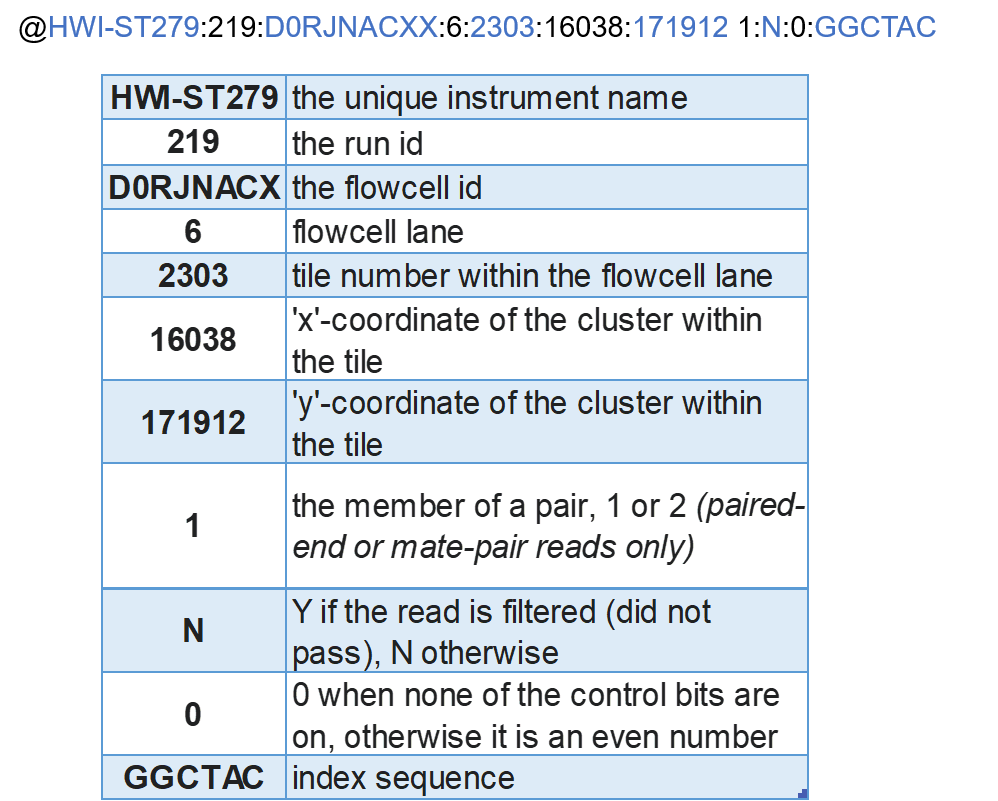
</div>
https://www.illumina.com/documents/products/datasheets/datasheet_genomic_sequence.pdf

### ¿Y el score de calidad?

Q score of 3 means P=0.5, meaning that there is a 50% chance the base is wrong,

<div>
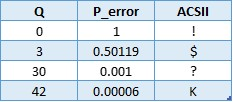
</div>

In [38]:
# from Bio import SeqIO
n = 0
for record in SeqIO.parse("archivos_trabajo/sample.fastq", "fastq"):
    if n < 5:
        print("%s %s" % (record.id, record.seq))
        n +=1
    else:break
        
print ('\n',record.letter_annotations.keys())
print (record.letter_annotations["phred_quality"])

HWI-ST279:219:D0RJNACXX:6:2303:16038:171912 TGAAGTAACACTAACAGAGAAAGTACATGTACTAAACAGTTCCTTAAGTGCAGTTGCTTCCTTGTGATAAACATTCTCTAAATCTCTAGTTGATGTTTGCC
HWI-ST279:219:D0RJNACXX:6:2303:16145:171918 GCTCTGAGATAGGTTCCAACTTCCTCCCGCGAACGCACCCGTACTTGCAGCCCAAAAACGAGAAGGGGAACAATAGAAAGCAAGTGAAAGGATGCTGCTGG
HWI-ST279:219:D0RJNACXX:6:2303:16023:171925 GACCCATATAAATATGCGGTCACTACATCCATCAACTGTATTTCTAAGTTCAAATTGACTGCCATAGATATTAAGAACCGGAATGTAATTCCATCCATTAC
HWI-ST279:219:D0RJNACXX:6:2303:16127:171927 CACCTGTGGCAAGAAACTTAATGTTCATTCAGGCTCGATTTCAGGCTTCAGCATTATCAAATTTCTCATCAAGAAAGGATGAAAACAAATGTAGGTTACAG
HWI-ST279:219:D0RJNACXX:6:2303:16211:171937 TTTAAATCTCTAACTATCTCTAACACTCAAATATGCTAAGTCTAATAATCTAATAATTTCTAACACTCACATATGCTAACTCTAATAATCTAATAATCTTA

 dict_keys(['phred_quality'])
[34, 34, 34, 37, 37, 37, 37, 37, 38, 39, 39, 39, 39, 41, 38, 40, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 40, 41, 41, 41, 41, 40, 41, 41, 40, 38, 40, 40, 41, 40, 40, 41, 41, 41, 41, 40, 41, 41, 40, 41, 41, 41, 41, 41, 41, 40, 41, 40, 41

<p id="Ejercicio_3"></p>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 3</h2>
<ul>
</ul>
    <p>Obtén el <b>número</b> de lecturas cuyo promedio de calidad esté por debajo del umbral dado.</p>
<p><span class="given-return">Input:</span> Un umbral de calidad, Junto con un fastq.</p>

<h3 id="sample-dataset">Sample Dataset</h3>
<div class="codehilite"><pre>
@Rosalind_0041
GGCCGGTCTATTTACGTTCTCACCCGACGTGACGTACGGTCC
+
6.3536354;.151&lt;211/0?::6/-2051)-*&quot;40/.,+%)
@Rosalind_0041
TCGTATGCGTAGCACTTGGTACAGGAAGTGAACATCCAGGAT
+
AH@FGGGJ&lt;GB&lt;&lt;9:GD=D@GG9=?A@DC=;:?&gt;839/4856
@Rosalind_0041
ATTCGGTAATTGGCGTGAATCTGTTCTGACTGATAGAGACAA
+
@DJEJEA?JHJ@8?F?IA3=;8@C95=;=?;&gt;D/:;74792.
</pre></div>


<h3 id="sample-output">Sample Output</h3>
<div class="codehilite"><pre>1
</pre></div>
</div> 

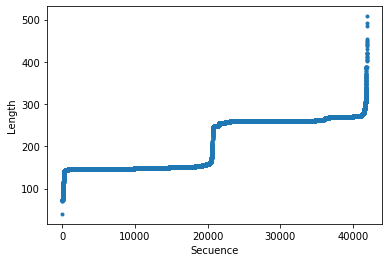

In [68]:
from Bio import SeqIO
from matplotlib.pyplot import *

# Get command-line arguments
lengths = []
# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    # Store read length
    lengths.append(len(read.seq))

    # sorted(lengths)
plot(sorted(lengths),'.')
xlabel('Secuence')
ylabel('Length')
show()
# savefig('readlengths.png')


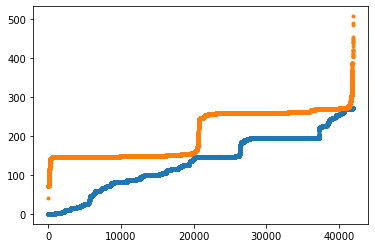

In [71]:

from matplotlib.pyplot import *
# Get command-line arguments
lengths1 = []
lengths2 = []

# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    phred_scores = read.letter_annotations["phred_quality"]
    l = 0
    for phsc in phred_scores:
        if phsc < 30:
            break
        l += 1
    lengths1.append(l)
    lengths2.append(len(read.seq))
# savefig('readlengths.png')
plot(sorted(lengths1),'.',sorted(lengths2),'.')
show()

In [17]:
%%bash
head -8 ./archivos_trabajo/SRR020192.fastq

@SRR020192.1 E0LM4JH01BLE1A
GATGACGGTGTCTACATTGTTCCCGACCACTCATCTCCTCTGTCATGCCCGAAACGTCTTCTCAAACCCGTCGTACGACGTTAGGTCGTCGAAACCGGAACCCGGGACCGGACGAACGACGTACGTCGTATAACGTAACCGTACCGTACCGTCCGTACGTACGGCGGTCGGGTCGGTACGGTACGGACGNNN
+
98<???88988?=<::<<<779333?4488??AAA?988<?A?A>==2222922.02::998<<0000022,00200000266000000000000000,,8000000,,,,................3....3;;;88;3..................................++.48........3.!!!
@SRR020192.2 E0LM4JH01BM23G
GATGACGGTGTCTACATCGTTCCACCACTCATCTCCTCTGTCATGCCCGAAAGTCTTCTCAAACCCGTTCGACACGTTTAGGTCCGTCGAAACCGGAACCCGGGTACCGGACGAACGAACGCGTCGTAGAGTAACGTACCGACCGTACCGTCCGTACGCGGTCGGTCGGTCGACGGACGCNN
+
<<<???889<<?=<<<<??<<<<?8888??AA??<<<<?>=>>>>200000002;0000<<00000222,0200028<<:==69946000000000,,00000000,,,,......................3373.................93..........3...3..........!!


In [74]:
import Bio.SeqIO

# Get command-line arguments

# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    # if the primer sequence is present
    if read.seq.startswith('GATGACGGTGT'):
        # remove it and output as FASTA
        read = read[11:]
        print(read.format("fastq"),end="")
        break


@SRR020192.1 E0LM4JH01BLE1A
CTACATTGTTCCCGACCACTCATCTCCTCTGTCATGCCCGAAACGTCTTCTCAAACCCGTCGTACGACGTTAGGTCGTCGAAACCGGAACCCGGGACCGGACGAACGACGTACGTCGTATAACGTAACCGTACCGTACCGTCCGTACGTACGGCGGTCGGGTCGGTACGGTACGGACGNNN
+
?=<::<<<779333?4488??AAA?988<?A?A>==2222922.02::998<<0000022,00200000266000000000000000,,8000000,,,,................3....3;;;88;3..................................++.48........3.!!!


### NCBI

The National Center for Biotechnology Information advances science and health by providing access to biomedical and genomic informationm

Almacena y constantemente actualiza la información referente a secuencias genómicas en GenBank, un índice de artículos científicos referentes a biomedicina, biotecnología, bioquímica, genética y genómica en PubMed, una recopilación de enfermedades genéticas humanas en OMIM, además de otros datos biotecnológicos de relevancia en diversas bases de datos.

<a id="GenBank"></a>

## <span style="color:#957DAD">GenBank</span>

### ¿Qué es GenBank?

The GenBank sequence database is an open access, annotated collection of all publicly available nucleotide sequences and their protein translations. It is produced and maintained by the National Center for Biotechnology Information (NCBI; a part of the National Institutes of Health in the United States) as part of the International Nucleotide Sequence Database Collaboration (INSDC).

### Formato GenBank

<p>
Más información sobre el formato en el siguiente link: <a href="https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html">
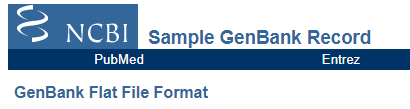
</p>


In [45]:
%%bash
less ./archivos_trabajo/aichi.gb

LOCUS       JN584162                 500 bp ss-RNA     linear   VRL 15-APR-2012
DEFINITION  Aichi virus isolate 462 VP1 gene, partial cds.
ACCESSION   JN584162
VERSION     JN584162.1
KEYWORDS    .
SOURCE      Aichi virus 1
  ORGANISM  Aichi virus 1
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Picornavirales; Picornaviridae; Kobuvirus.
REFERENCE   1  (bases 1 to 500)
  AUTHORS   Jonsson,N., Wahlstrom,K., Svensson,L., Serrander,L. and
            Lindberg,A.M.
  TITLE     Aichi virus infection in elderly people in Sweden
  JOURNAL   Arch. Virol. (2012) In press
   PUBMED   22466255
  REMARK    Publication Status: Available-Online prior to print
REFERENCE   2  (bases 1 to 500)
  AUTHORS   Lindberg,A.M. and Jonsson,N.
  TITLE     Direct Submission
  JOURNAL   Submitted (15-AUG-2011) School of Natural Sciences, Linnaeus
            University, Smalandsgatan 24, Kalmar, Smaland SE-391 82, Sweden
FEATURES             Location/Qualifiers
     source

**source**

Mandatory feature in each record that summarizes the length of the sequence, scientific name of the source organism, and Taxon ID number. Can also include other information such as map location, strain, clone, tissue type, etc., if provided by submitter.


**CDS**

Coding sequence; region of nucleotides that corresponds with the sequence of amino acids in a protein (location includes start and stop codons). The CDS feature includes an amino acid translation. Authors can specify the nature of the CDS by using the qualifier "/evidence=experimental" or "/evidence=not_experimental".

**gene**
	
A region of biological interest identified as a gene and for which a name has been assigned. The base span for the gene feature is dependent on the furthest 5' and 3' features. 

### Consiguiendo anotaciones del archivo GenBank

Para leer secuencias de un archivo genbank, no hay muchos cambios.

In [9]:
# from Bio import SeqIO
for gb_record in SeqIO.parse("archivos_trabajo/aichi.gb", "genbank"):
    print('ID',gb_record.id)
    print('Secuencia',str(gb_record.seq)[0:60],'...')
    print('Longitud',len(gb_record))

ID JN584162.1
Secuencia TCCCTCCAGACACCAAACTGGAAAACTTCTTCTCCTTCTACCGCTTGCTGCCCATGGGTG ...
Longitud 500


In [10]:
atributos = gb_record.__dict__
atributos.keys()

dict_keys(['_seq', 'id', 'name', 'description', 'dbxrefs', 'annotations', '_per_letter_annotations', 'features'])

In [11]:
gb_record.annotations

{'molecule_type': 'ss-RNA',
 'topology': 'linear',
 'data_file_division': 'VRL',
 'date': '15-APR-2012',
 'accessions': ['JN584162'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'Aichi virus 1',
 'organism': 'Aichi virus 1',
 'taxonomy': ['Viruses',
  'Riboviria',
  'Orthornavirae',
  'Pisuviricota',
  'Pisoniviricetes',
  'Picornavirales',
  'Picornaviridae',
  'Kobuvirus'],
 'references': [Reference(title='Aichi virus infection in elderly people in Sweden', ...),
  Reference(title='Direct Submission', ...)]}

In [12]:
for i,feature in enumerate(gb_record.features):
    print("Feature",i+1,'\n',feature)

Feature 1 
 type: source
location: [0:500](+)
qualifiers:
    Key: collection_date, Value: ['2009']
    Key: country, Value: ['Sweden']
    Key: db_xref, Value: ['taxon:1313215']
    Key: host, Value: ['Homo sapiens']
    Key: isolate, Value: ['462']
    Key: isolation_source, Value: ['feces']
    Key: mol_type, Value: ['genomic RNA']
    Key: organism, Value: ['Aichi virus 1']

Feature 2 
 type: CDS
location: [<0:>500](+)
qualifiers:
    Key: codon_start, Value: ['3']
    Key: product, Value: ['VP1']
    Key: protein_id, Value: ['AFH54897.1']
    Key: translation, Value: ['PPDTKLENFFSFYRLLPMGGSGAPALSFPADEGTIIPLNPINWLKGADVSGIAAMLSCFTYIAADLRITLRFSNPNDNPATMLVAFAPPGATIPLKPTRQMLSNFYMAEVPVSAATSTMVSFSIPYTSPLSAIPTSYFGWEDWSGTNFGQLSSGSWGNLMLIPSLS']



In [14]:
feature.type

'CDS'

In [20]:
feature.location.__dict__

{'_start': BeforePosition(0),
 '_end': AfterPosition(500),
 '_strand': 1,
 'ref': None,
 'ref_db': None}

In [19]:
feature.location.nofuzzy_end

500

In [52]:
start = feature.location.nofuzzy_start
end = feature.location.nofuzzy_end
value = gb_record.seq[start:end]


In [44]:
value.translate()

Seq('SLQTPNWKTSSPSTACCPWVAAVLQLFLSPLTKAQSSHSTQSIGSKGRTSPGSL...PLS')

### ¿Por qué no es la misma proteína?

In [55]:
#feature.qualifiers



OrderedDict([('codon_start', ['3']),
             ('product', ['VP1']),
             ('protein_id', ['AFH54897.1']),
             ('translation',
              ['PPDTKLENFFSFYRLLPMGGSGAPALSFPADEGTIIPLNPINWLKGADVSGIAAMLSCFTYIAADLRITLRFSNPNDNPATMLVAFAPPGATIPLKPTRQMLSNFYMAEVPVSAATSTMVSFSIPYTSPLSAIPTSYFGWEDWSGTNFGQLSSGSWGNLMLIPSLS'])])

<a id="Ejercicio_4"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 4</h2>
<ul>
    El archivo hepatitis.gb contiene información sobre la región de ADN que codifica HBx, una proteína viral de la hepatitis B multifuncional involucrada en la modulación de varias vías al interactuar directa o indirectamente con factores del hospedero (degradación de proteínas, apoptosis, transcripción, transducción de señales, progreso del ciclo celular y estabilidad genética). Escribe un programa de Python que, utilizando este registro de genbank, guarde la secuencia de proteínas correspondiente en formato fasta.
    </ul>
</div>

<p id="#Protein_Data_Bank"></p>


<a id="Protein_Data_Bank"></a>

## <span style="color:#957DAD">Protein Data Bank</span>

El Protein Data Bank (PDB) (Banco de Datos de Proteínas) es una base de datos de la estructura tridimensional de las proteínas y ácidos nucleicos. Estos datos, generalmente obtenidos mediante cristalografía de rayos X o resonancia magnética nuclear, son enviados por biólogos y bioquímicos de todo el mundo. Están bajo el dominio público y pueden ser usados libremente.

 ###  Objeto Structure

El Objeto Structure sigue el formato llamado SMCRA (Structure/Model/Chain/Residue/-
Atom):
+ Un *structure* consiste de *models*
+ Un *model* consiste de *chains*
+ Un *chain* consiste de *residues*
+ Un *residue* consiste de *atoms*


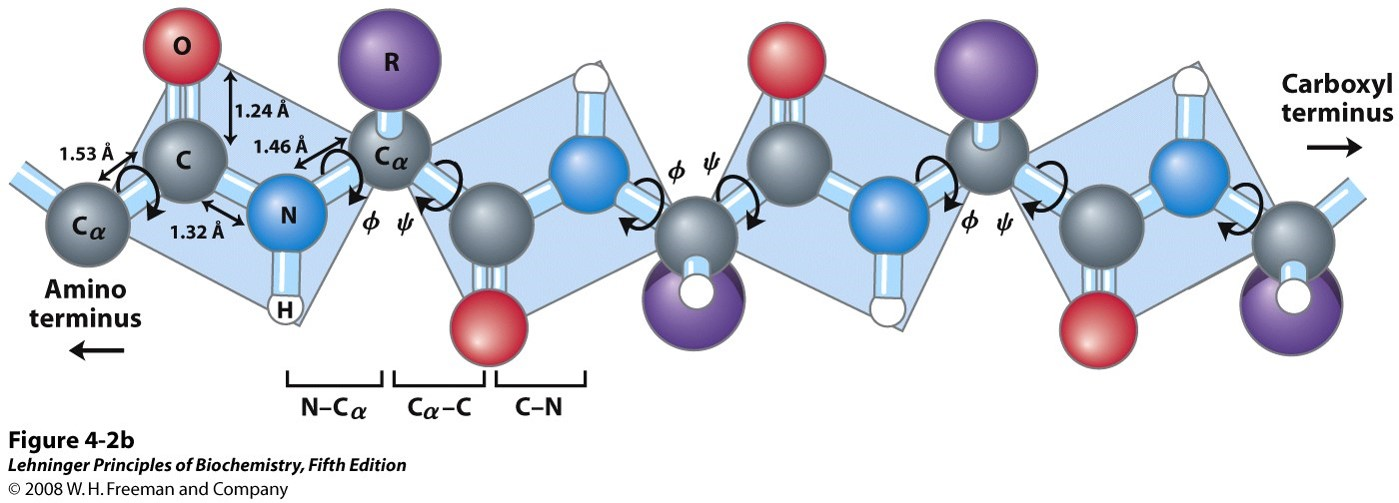

In [90]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[1-5]:"
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[100-102]:"
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[7500-7502]:"


In [86]:
%%bash
head -n 5 ./archivos_trabajo/1fat.pdb
sed -n 100,102p ./archivos_trabajo/1fat.pdb
sed -n 7500,7502p ./archivos_trabajo/1fat.pdb

HEADER    LECTIN                                  12-JUN-96   1FAT              
TITLE     PHYTOHEMAGGLUTININ-L                                                  
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: PHYTOHEMAGGLUTININ-L;                                      
COMPND   3 CHAIN: A, B, C, D;                                                   
REMARK   3  ESTIMATED COORDINATE ERROR.                                         
REMARK   3   ESD FROM LUZZATI PLOT        (A) : NULL                            
REMARK   3   ESD FROM SIGMAA              (A) : NULL                            
ATOM   6698  C   THR D 171      26.426  23.953  17.440  1.00 19.01           C  
ATOM   6699  O   THR D 171      27.087  24.766  16.837  1.00 21.78           O  
ATOM   6700  CB  THR D 171      28.057  23.154  19.029  1.00 18.70           C  


In [78]:
from Bio import PDB
parser = PDB.PDBParser(QUIET=True)
struc = parser.get_structure("prot_ifat", "./archivos_trabajo/1fat.pdb")
n_atoms = 0
for model in struc:
    for chain in model:
        for residue in chain:
#             print(residue.resname, residue.id)
            for atom in residue:
                
                n_atoms += 1
print(n_atoms)


7248


In [25]:
n_atoms = 0
for atom in struc.get_atoms():
#     print (atom)
    n_atoms += 1
print(n_atoms)

7248


In [25]:
# for residue in model.get_residues():
#     print (residue)

In [87]:
atoms = struc.get_atoms()
residue = struc.get_residues()
atoms = chain.get_atoms()

In [88]:
for n in residue:
    print(n)
    break

<Residue SER het=  resseq=1 icode= >


In [ ]:
#resseq  residue sequence number

In [89]:
n.get_full_id()

('prot_ifat', 0, 'A', (' ', 1, ' '))

In [37]:
atoms = n.get_atoms()

In [39]:
for atom in atoms:
    print(atom.id)
    break

N


In [29]:
# Obtiene todos los 'residues' de un 'structure'
res_list = PDB.Selection.unfold_entities(struc, "R")
# Obtiene todos los 'atoms' de una 'chain'
atom_list = PDB.Selection.unfold_entities(chain, "A")

A=atom, R=residue, C=chain, M=model, S=structure. Puedes utilizar
esto para subir en la jerarquía, eg. para obtener una lista (unica) de *Residue* o *Chain* similares de
una lista de *Atoms*:

In [30]:
residue_list = PDB.Selection.unfold_entities(atom_list, "R")
chain_list = PDB.Selection.unfold_entities(atom_list, "C")

¿Cómo extraigo un Atom/Residue/Chain/Model especifico de un *Structure*?
Fácil. Aquí hay unos ejemplos:
    

In [31]:
# https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/dealing-with-coordinates

In [46]:
model = struc[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

In [35]:
atom.element

'C'

In [47]:
residue

<Residue LYS het=  resseq=100 icode= >

Ten en cuenta que se puede utilizar un atajo:

In [53]:
atom=struc[0]["A"][100]["CA"]

In [41]:
chain_v2 = struc[0]["A"]
residue_v2 = struc[0]["A"][100]
atom_v2 = struc[0]["A"][100]["CA"]

In [55]:
residue_v2 == residue

True

También podemos obtener las coordenadas de los átomos

In [44]:
atom.get_coord()

array([26.353,  7.479, 32.461], dtype=float32)

#### ¿Qué es un model id?
El model id es un entero que denota el rango del modelo en el archivo PDB/mmCIF. el model id inicia en 0. Las estructuras de cristal generalmente tienen un solo modelo (con un id de 0), mientras que los archivos NMR usualmente contienen varios modelos.

####  ¿Qué es un chain id?
El chain id es especificado en el archivo PDB/mmCIF, solo es una cosa (usualmente; una letra).

#### ¿Qué es un residue id?
Esto es un poco más complicado, debido al torpe formato PDB. Un residue id es una tupla con 3 elementos:

El hetero-flag: Esto es 'H_' más el nombre del hetero-residue (e.g. 'H_GLC' en el caso de una molécula de glucosa), o 'W' en el caso de una molécula de agua.
El identificador de secuencia en la cadena, e.g. 100
El código de inserción, e.g. 'A'. El código de inserción a veces se utiliza para preservar un cierto esquema de numeración de residuos deseable. A Ser 80 inserción mutante (colocado e.g. entre un Thr 80 y un Asn 81 residue) podría e.g. tener identificadores de secuencia y códigos de inserción de la siguiente manera: Thr 80 A, Ser 80 B, Asn 81. De esta manera, el esquema de numeración de residuos se mantiene en sintonía con el de la wild type structure.
Así, el id del residuo de glucosa anterior sería ('H_GLC', 100, 'A'). Si el hetero-flag and y el código de inserción están vacios, se puede utilizar solamente el identificador de secuencia:

In [48]:
# Full id
residue = chain[(" ", 100, " ")]
# Shortcut id
residue = chain[100]

<a id="Ejercicio_5"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 5</h2>
<ul>
    
+ Consigue el *structure* del archivo pdb 4hhb

+ Imprime las coordenadas 3d del átomo C-alpha del aminoacido con residuo número 20 en chain C y asigna ese residuo a una variable.

+ Calcula el centro geométrico (centroid) del aminoacido mencionado anteriormente e imprímelo (esto asume que las masas de los átomos son iguales)

Para calular el centro geométrico se necesitan sacar las coordenadas de todos los átomos del residuo y sacar el promedio.
</ul>
</div>

Con el ejemplo del residuo utilizado en **clase** debe darles:
```python
>>> centroid(residue)
[27.96233346727159, -10.11222219467163, 56.41411124335395]
```


#### ¿Qué es un atom id?
El atom id simplemente es el nombre del átomo (eg. ’CA’). En práctica, el nombre del átomo es creado quitando todos los espacios del nombre del átomo en el archivo PDB.
Sin embargo, en los archivos PDB, un espacio puede ser parte del nombre de un átomo. A menudo, los átomos de calcio
son llamados ’CA..’ para así, distinguirlos de átomos Cα (que son llamados
’.CA.’). En casos en los que quitar los espacios pueda crear problemas (ie. 2 átomos llamados ’CA’ en el mismo residuo) los espacios se quedan.

In [ ]:
model = struc[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

In [ ]:
# OG hydrogen bonding

In [101]:
%%bash
sed -n 7492,7505p ./archivos_trabajo/1fat.pdb

ATOM   6690  N   SER D 170      23.416  21.096  19.858  1.00 20.74           N  
ATOM   6691  CA  SER D 170      23.710  22.230  20.734  1.00 30.53           C  
ATOM   6692  C   SER D 170      24.571  23.305  20.087  1.00 32.49           C  
ATOM   6693  O   SER D 170      24.185  24.488  20.029  1.00 37.32           O  
ATOM   6694  CB  SER D 170      24.345  21.774  22.049  1.00 27.88           C  
ATOM   6695  OG  SER D 170      25.509  21.032  21.812  1.00 46.44           O  
ATOM   6696  N   THR D 171      25.707  22.868  19.547  1.00 31.64           N  
ATOM   6697  CA  THR D 171      26.676  23.745  18.912  1.00 21.12           C  
ATOM   6698  C   THR D 171      26.426  23.953  17.440  1.00 19.01           C  
ATOM   6699  O   THR D 171      27.087  24.766  16.837  1.00 21.78           O  
ATOM   6700  CB  THR D 171      28.057  23.154  19.029  1.00 18.70           C  
ATOM   6701  OG1 THR D 171      28.060  21.883  18.364  1.00 26.28           O  
ATOM   6702  CG2 THR D 171  

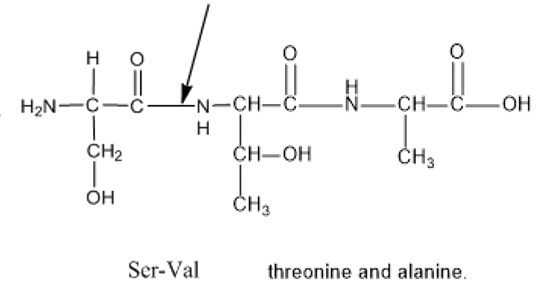

In [108]:
import Bio.PDB.PDBParser

# Use QUIET=True to avoid lots of warnings...
model = struc[0]
achain = model['A']
for residue in achain:
    
    index = residue.get_id()[1]
    calpha = residue['CA']
    carbon = residue['C']
    nitrogen = residue['N']
    oxygen = residue['O']
    if index > 231:
        print("Residue:",residue.get_resname(),index)
        print("N  - Ca",(nitrogen - calpha))
        print("Ca - C ",(calpha - carbon))
        print("C  - O ",(carbon - oxygen))
        print()


Residue: LEU 232
N  - Ca 1.4458734
Ca - C  1.4928958
C  - O  1.223955

Residue: SER 233
N  - Ca 1.4633723
Ca - C  1.5240084
C  - O  1.2534999



KeyError: 'CA'

In [109]:
residue

<Residue NAG het=H_NAG resseq=253 icode= >

In [105]:
# model = struc[0]
# achain = model['A']
# for residue in achain:
#     a= residue['C']
#     break

In [110]:
print("Residue:",residue.get_resname(),index)

Residue: NAG 253


In [111]:
residue.get_full_id()

('prot_ifat', 0, 'A', ('H_NAG', 253, ' '))

N-acetyl Glucosamine (NAG) 

In [65]:
atoms_nag = residue.get_atoms()

In [66]:
for atom in atoms_nag:
    print(atom.id, atom.element)

C1 C
C2 C
C3 C
C4 C
C5 C
C6 C
C7 C
C8 C
N2 N
O3 O
O4 O
O5 O
O6 O
O7 O


In [73]:
residue.child_dict

{'C1': <Atom C1>,
 'C2': <Atom C2>,
 'C3': <Atom C3>,
 'C4': <Atom C4>,
 'C5': <Atom C5>,
 'C6': <Atom C6>,
 'C7': <Atom C7>,
 'C8': <Atom C8>,
 'N2': <Atom N2>,
 'O3': <Atom O3>,
 'O4': <Atom O4>,
 'O5': <Atom O5>,
 'O6': <Atom O6>,
 'O7': <Atom O7>}

In [95]:
for residue in achain:
    index = residue.get_id()[1]
    calpha = residue['CA']
    carbon = residue['C']
    nitrogen = residue['N']
    oxygen = residue['O']

    print("Residue:",residue.get_resname(),index)
    print("N  - Ca",(nitrogen - calpha)) #Calcula automáticamente las distancias.
    print("Ca - C ",(calpha - carbon))
    print("C  - O ",(carbon - oxygen))

    if achain.has_id(index+1):
        nextresidue = achain[index+1]
        nextnitrogen = nextresidue['N']
        print("C  - N ",(carbon - nextnitrogen))
    if index == 3: break

    print()

Residue: SER 1
N  - Ca 1.4838679
Ca - C  1.5232947
C  - O  1.2230194
C  - N  1.3204455

Residue: ASN 2
N  - Ca 1.4577093
Ca - C  1.4901696
C  - O  1.2276365
C  - N  1.324535

Residue: ASP 3
N  - Ca 1.4214085
Ca - C  1.5145017
C  - O  1.2235078
C  - N  1.3174167


<a id="BLAST_Output"></a>
## <span style="color:#957DAD">BLAST Output</span>

https://www.ncbi.nlm.nih.gov/
<div>
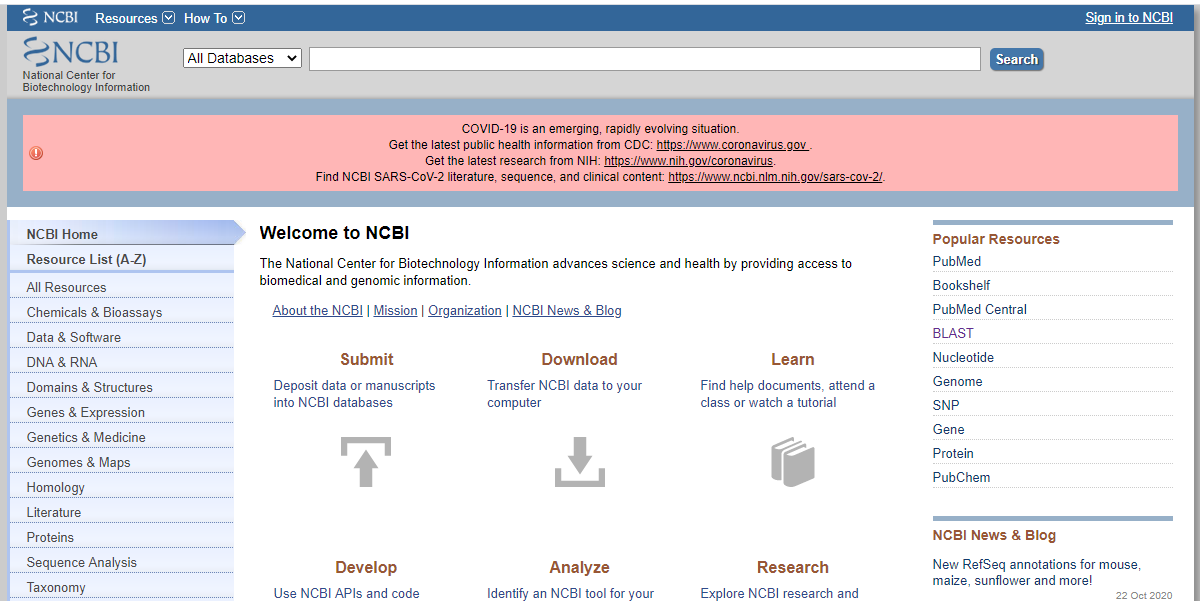
</div>

### BLAST

https://blast.ncbi.nlm.nih.gov/Blast.cgi
<div>
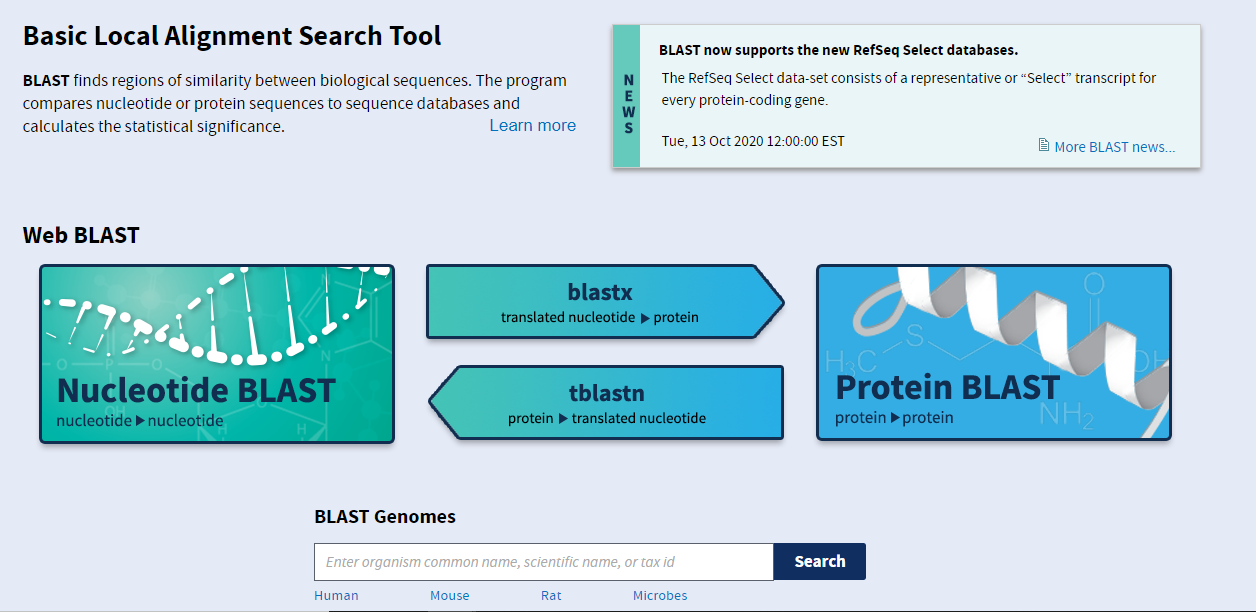
</div>

### Alineamiento local 

<div>
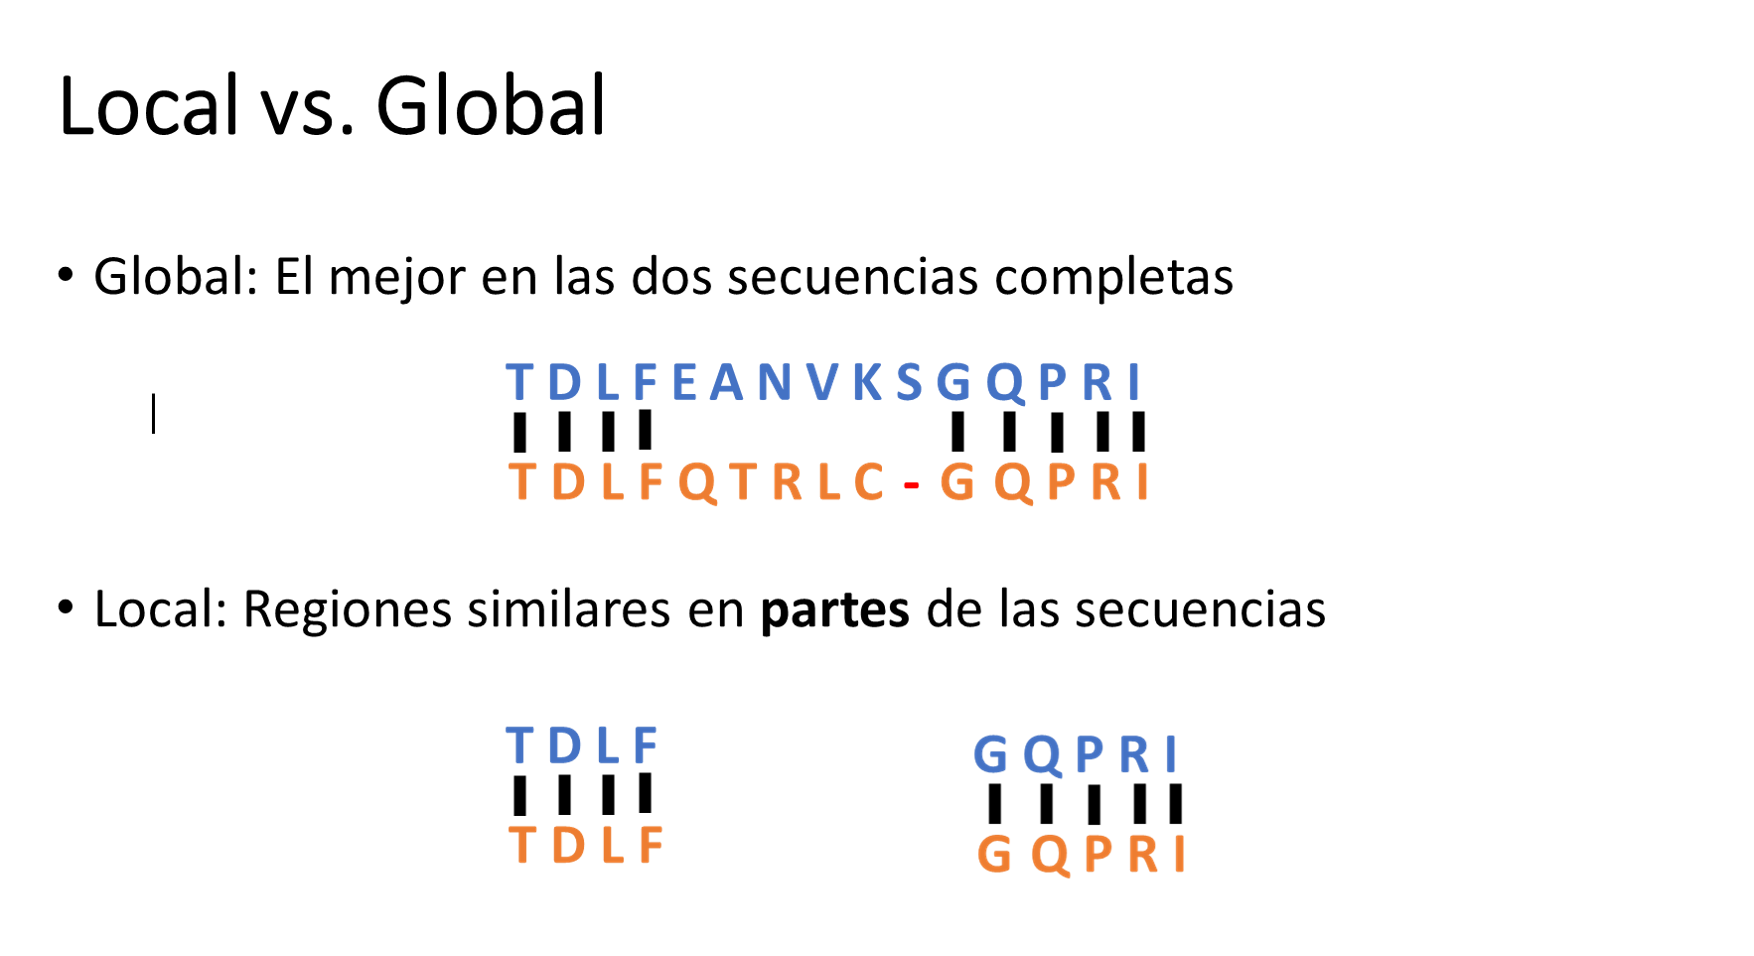
</div>



Para hacer un simple BLAST parsing, pregunta por el formato de salida en columnas separadas por tabulaciones (`-outfmt 6` or `-outfmt 7`) 


Si quieres parsear la sálida completa de blast con biopython, es mejor trabajar con XML formatted BLAST output `-outfmt 5`. Descifra el método parsing con menos facilidad. El código es estable para trabajar con NCBI blast.

Glosario de NCBI :
https://www.ncbi.nlm.nih.gov/books/NBK62051/#:~:text=A%20High%2Dscoring%20Segment%20Pair,often%20expressed%20as%20a%20percentage.


<div>
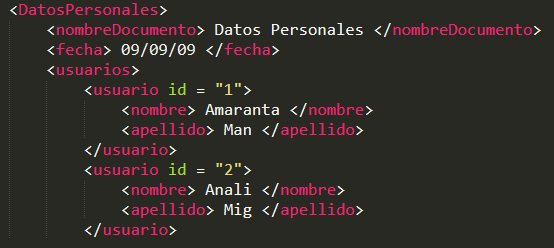
</div>


High-scoring Segment Pair (HSP) 

<div>
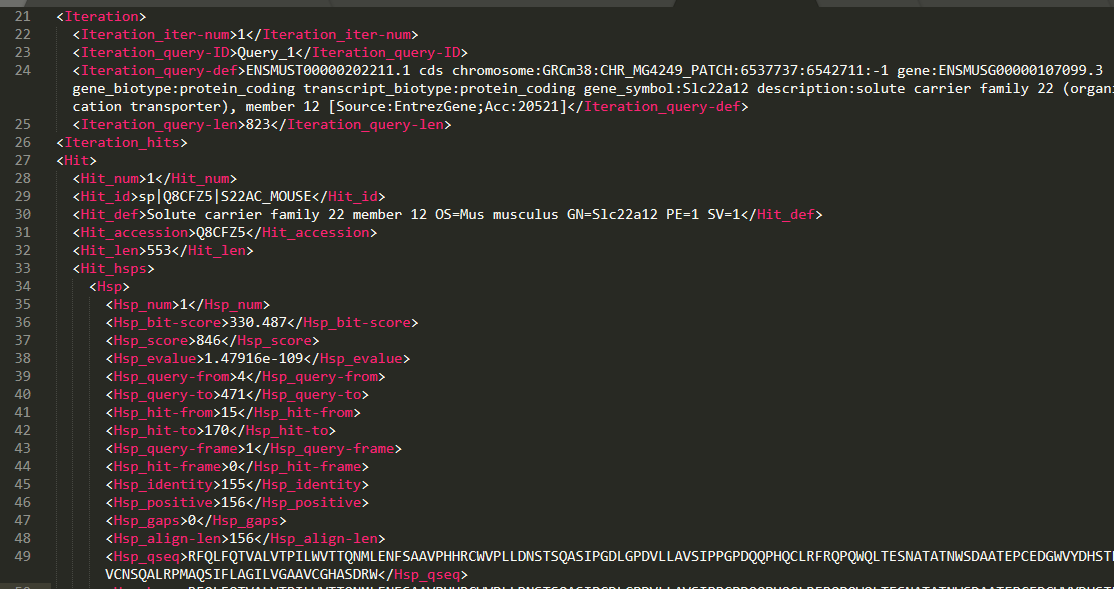
</div>


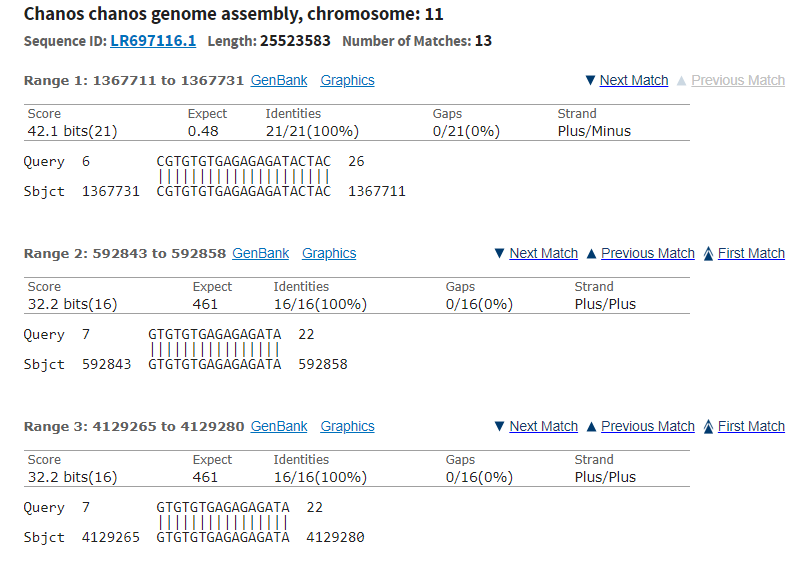

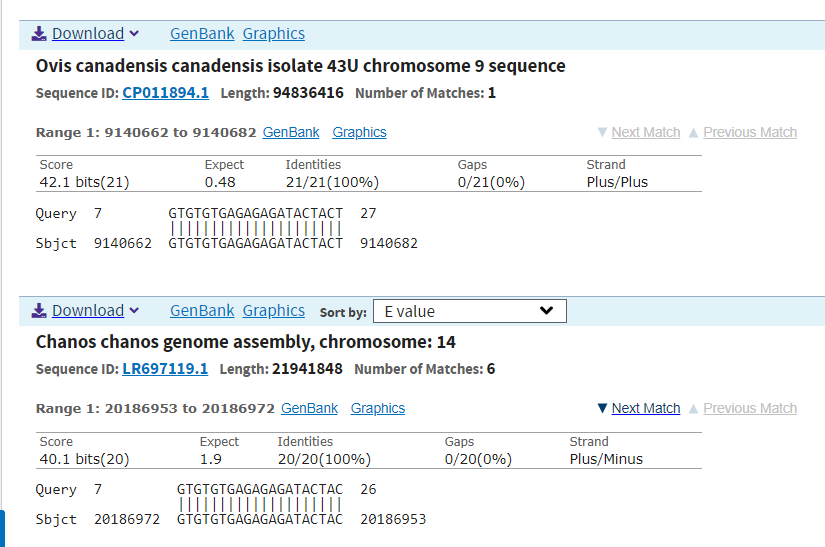

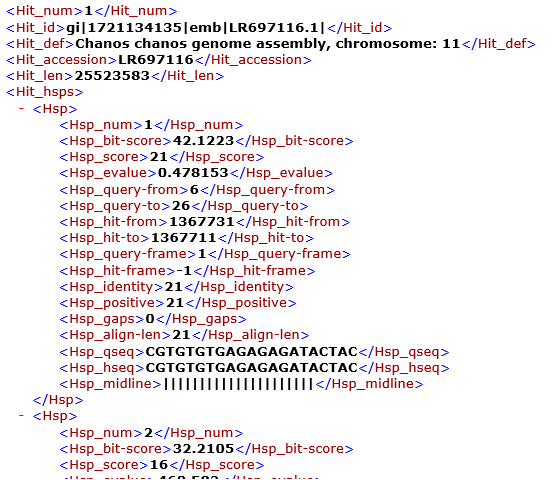

Para parsear el output, tendrás que escribir algo así

In [58]:
n = 0

from Bio.Blast import NCBIXML
result_handle = open("archivos_trabajo/test.blastout.xml")
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if n<5:
                print('id', alignment.title)
                print('E = ' , hsp.expect)
                n += 1
            else:
                break

id sp|Q8CFZ5|S22AC_MOUSE Solute carrier family 22 member 12 OS=Mus musculus GN=Slc22a12 PE=1 SV=1
E =  1.47916e-109
id sp|Q8CFZ5|S22AC_MOUSE Solute carrier family 22 member 12 OS=Mus musculus GN=Slc22a12 PE=1 SV=1
E =  1.20034e-74
id sp|Q3ZAV1|S22AC_RAT Solute carrier family 22 member 12 OS=Rattus norvegicus GN=Slc22a12 PE=2 SV=1
E =  7.69823e-103
id sp|Q3ZAV1|S22AC_RAT Solute carrier family 22 member 12 OS=Rattus norvegicus GN=Slc22a12 PE=2 SV=1
E =  1.31588e-62
id sp|Q96S37|S22AC_HUMAN Solute carrier family 22 member 12 OS=Homo sapiens GN=SLC22A12 PE=1 SV=1
E =  3.00718e-78


In [59]:
atributos = blast_record.__dict__
atributos.keys()

dict_keys(['application', 'version', 'date', 'reference', 'query', 'query_letters', 'database', 'database_sequences', 'database_letters', 'database_name', 'posted_date', 'num_letters_in_database', 'num_sequences_in_database', 'ka_params', 'gapped', 'ka_params_gap', 'matrix', 'gap_penalties', 'sc_match', 'sc_mismatch', 'num_hits', 'num_sequences', 'num_good_extends', 'num_seqs_better_e', 'hsps_no_gap', 'hsps_prelim_gapped', 'hsps_prelim_gapped_attemped', 'hsps_gapped', 'query_id', 'query_length', 'database_length', 'effective_hsp_length', 'effective_query_length', 'effective_database_length', 'effective_search_space', 'effective_search_space_used', 'frameshift', 'threshold', 'window_size', 'dropoff_1st_pass', 'gap_x_dropoff', 'gap_x_dropoff_final', 'gap_trigger', 'blast_cutoff', 'descriptions', 'alignments', 'multiple_alignment', 'filter', 'expect'])

In [60]:
atributos = alignment.__dict__
atributos.keys()

dict_keys(['title', 'hit_id', 'hit_def', 'length', 'hsps', 'accession'])

In [61]:
atributos = hsp.__dict__
atributos.keys()

dict_keys(['score', 'bits', 'expect', 'num_alignments', 'identities', 'positives', 'gaps', 'align_length', 'strand', 'frame', 'query', 'query_start', 'query_end', 'match', 'sbjct', 'sbjct_start', 'sbjct_end'])

In [62]:
blast_record.query_id

'Query_1'

In [63]:
alignment.hit_id


'sp|Q9Y267|S22AE_HUMAN'

In [64]:
hsp.expect

2.35119e-06

https://www.youtube.com/watch?v=ZN3RrXAe0uM

El valor Esperado (E) es un parámetro que describe el número de éxitos que uno puede "esperar" ver cuando se busca en una base de datos de un tamaño particular. Disminuye exponencialmente al mismo tiempo que el Score (S) del match aumenta. Esencialmente, el valor E describe el ruido de fondo aleatorio.


<a id="Ejercicio_6"></a>

<div class="alert alert-block alert-info">
<h2 id="problem">Ejercicio 6</h2>

1. Usando el archivo test.blastout.xml parsea los resultados e imprime lo siguiente "queryName	hitID	e-value	hitDesc	Hsp_num" Si el valor es mejor (meno) que 1e-10. (el query name lo encuentran en el blast_record y el hitDesc dentro del alignment.hit_def)

```python
>>>blast_record.query_id
'Query_1'
>>>alignment.hit_id
'sp|Q9Y267|S22AE_HUMAN'
>>>alignment.hit_def
'Solute carrier family 22 member 14 OS=Homo sapiens GN=SLC22A14 PE=2 SV=4'
>>>hsp.expect
2.35119e-06
```

|Query Name|Hit ID|e-Value|Hit Description|Hsp Number|
|:---------:|:----:|:------:|:----:|:------:|
|Query_1|sp\|Q9Y267\|S22AE_HUMAN|2.35119e-06|Solute carrier family 22 member 14|1|

</div>

<a id="File_Format_Conversions"></a>

## <span style="color:#957DAD">Conversiones de formato de archivo</span>

Muchas son directas; otras, un poco más complicadas ya que el alfabeto no puede ser determinado desde los datos. Usualmente, es más fácil ir de formatos más complicados a más simples

In [65]:
# from Bio import SeqIO
fasta_records = SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta")  
tab_records = SeqIO.write(fasta_records , 'seqs.tab' , 'tab')

Produce

In [28]:
# %%cmd
# findstr /n "."  .\seqs.tab | findstr "^[1-5]:"

In [29]:
%%bash
less ./seqs.tab


seq1	AAGAGCAGCTCGCGCTAATGTGATAGATGGCGGTAAAGTAAATGTCCTATGGGCCACCAATTATGGTGTATGAGTGAATCTCTGGTCCGAGATTCACTGAGTAACTGCTGTACACAGTAGTAACACGTGGAGATCCCATAAGCTTCACGTGTGGTCCAATAAAACACTCCGTTGGTCAAC
seq2	GCCACAGAGCCTAGGACCCCAACCTAACCTAACCTAACCTAACCTACAGTTTGATCTTAACCATGAGGCTGAGAAGCGATGTCCTGACCGGCCTGTCCTAACCGCCCTGACCTAACCGGCTTGACCTAACCGCCCTGACCTAACCAGGCTAACCTAACCAAACCGTGAAAAAAGGAATCT
seq3	ATGAAAGTTACATAAAGACTATTCGATGCATAAATAGTTCAGTTTTGAAAACTTACATTTTGTTAAAGTCAGGTACTTGTGTATAATATCAACTAAAT
seq4	ATGCTAACCAAAGTTTCAGTTCGGACGTGTCGATGAGCGACGCTCAAAAAGGAAACAACATGCCAAATAGAAACGATCAATTCGGCGATGGAAATCAGAACAACGATCAGTTTGGAAATCAAAATAGAAATAACGGGAACGATCAGTTTAATAACATGATGCAGAATAAAGGGAATAATCAATTTAATCCAGGTAATCAGAACAGAGGT


Aun más fácil es el método convert(). Vamos a intentar fastq a fasta.

In [67]:
# from Bio import SeqIO
fasta_records = SeqIO.convert('archivos_trabajo/sample.fastq', 'fastq', 'sample.converted.fa', 'fasta')

In [18]:
# %%cmd
# findstr /n "." .\archivos_trabajo\sample.fastq | findstr "^[1-5]:"
# printf '\n\n'
# findstr /n "."  .\sample.converted.fa  | findstr "^[1-5]:"

In [9]:
%%bash
head -n 5 ./archivos_trabajo/sample.fastq
printf '\n\n'
head -n 5 ./sample.converted.fa

@HWI-ST279:219:D0RJNACXX:6:2303:16038:171912 1:N:0:GGCTAC
TGAAGTAACACTAACAGAGAAAGTACATGTACTAAACAGTTCCTTAAGTGCAGTTGCTTCCTTGTGATAAACATTCTCTAAATCTCTAGTTGATGTTTGCC
+
CCCFFEFFHHHHGJJJJJJIJJJJJJJJJHIIIIJGHGHHHIJIJJJJHGIJJJJGJJJJJJJJJJJJJJJJJIJHIJJJJJJJHHHHHFHFFFFFFFDEE
@HWI-ST279:219:D0RJNACXX:6:2303:16145:171918 1:N:0:GGCTAC


>HWI-ST279:219:D0RJNACXX:6:2303:16038:171912 1:N:0:GGCTAC
TGAAGTAACACTAACAGAGAAAGTACATGTACTAAACAGTTCCTTAAGTGCAGTTGCTTC
CTTGTGATAAACATTCTCTAAATCTCTAGTTGATGTTTGCC
>HWI-ST279:219:D0RJNACXX:6:2303:16145:171918 1:N:0:GGCTAC
GCTCTGAGATAGGTTCCAACTTCCTCCCGCGAACGCACCCGTACTTGCAGCCCAAAAACG


In [69]:
with open("./archivos_trabajo/aichi.gb") as input_handle:
    with open("aichi.fasta", "w") as output_handle:
        sequences = SeqIO.parse(input_handle, "genbank")
        count = SeqIO.write(sequences, output_handle, "fasta")

print("Converted %i records" % count)

Converted 1 records


In [ ]:
# %%cmd
# findstr /n "." .\archivos_trabajo\aichi.gb | findstr "^[1-5]:" 

In [14]:
%%bash
head -5 ./archivos_trabajo/aichi.gb

LOCUS       JN584162                 500 bp ss-RNA     linear   VRL 15-APR-2012
DEFINITION  Aichi virus isolate 462 VP1 gene, partial cds.
ACCESSION   JN584162
VERSION     JN584162.1
KEYWORDS    .


In [8]:
# %%cmd
# findstr /n "." .\archivos_trabajo\aichi.gb | findstr "^[1-5]:" 

In [ ]:
#more

In [1]:
%%bash
head -5 ./aichi.fasta

>JN584162.1 Aichi virus isolate 462 VP1 gene, partial cds
TCCCTCCAGACACCAAACTGGAAAACTTCTTCTCCTTCTACCGCTTGCTGCCCATGGGTG
GCAGCGGTGCTCCAGCTCTTTCTTTCCCCGCTGACGAAGGCACAATCATCCCACTCAACC
CAATCAATTGGCTCAAAGGGGCGGACGTCTCCGGGATCGCTGCGATGCTATCGTGCTTCA
CGTACATCGCTGCGGACCTGCGAATCACGCTCCGCTTCTCCAACCCAAATGACAACCCTG


http://rosalind.info/problems/locations/